In [389]:
import pandas as pd
import requests
import os
import tweepy
import json
import re
import datetime
import matplotlib.pyplot as plt
% matplotlib inline 

# Gathering

In [390]:
#importing twitter-archive-enhanced.csv
archive = pd.read_csv("twitter-archive-enhanced.csv")

In [284]:
#testing archive file
archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [48]:
#Downloading image-predictions.tsv programmatically using requests
folder_name = "image_predictions"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open(os.path.join(folder_name,url.split("/")[-1]), mode = "wb") as file:
    file.write(response.content)

In [391]:
# importing image-predictions.tsv file
image_predictions = pd.read_csv("image-predictions.tsv", sep="\t")

In [5]:
# test image_predictions file
image_predictions.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [81]:
#importing data from twitter api using tweepy
consumer_key = '************************'
consumer_secret = '********************************'
access_token = '***********************************'
access_secret = '**************************************'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [89]:
# Experimenting to extract one tweet's id information after creating an API object
exp_tweet = api.get_status(archive.tweet_id[1000], tweet_mode = 'extended')
content = exp_tweet._json
print(content.keys())

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])


In [83]:
#storing the values of tweet_id into tweet_ids 
tweet_ids = archive.tweet_id.values

In [4]:
#importing data from twitter API
fails_dict = {}
# Save each tweet's returned JSON as a new line in a .txt file
if not os.path.isfile('tweet_json.txt'):
    with open('tweet_json.txt', 'w') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            print(str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
print(fails_dict)


{}


In [392]:
# read json file to a dataframe
api = pd.read_json('tweet_json.txt', lines = True,encoding='utf-8')

In [287]:
#testing my code
api.head(1)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",35327,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,7455,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


# Assessing

In [8]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [120]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [128]:
archive[archive.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [38]:
archive[archive.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [110]:
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [118]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [121]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [129]:
image_predictions[image_predictions.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [34]:
image_predictions[image_predictions.jpg_url.isnull()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [119]:
api.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",35327,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,7455,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",30579,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5535,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",23005,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3661,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",38618,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,7627,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",36898,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,8227,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [122]:
api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2331 non-null datetime64[ns]
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null bool
full_text                        2331 non-null object
geo                              0 non-null float64
id                               2331 non-null int64
id_str                           2331 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [131]:
api[api.id.duplicated()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user


### Quality
- 1) in archive : some rows has NaN expanded_urls
- 2) in archive : source column has extra string before and after 
- 3) in archive : tweet_id have wrong type
- 4) in archive : empty values in dog_type
- 5) in archive : timestamp is string and it should be datetime
- 6) in image_prediction : some dogs names are upper case and others are lower case
- 7) in image_prediction : tweet_id have wrong type
- 8) in api : id instead of tweet_id
- 9) in api : tweet_id have wrong type


### Tidiness
- 1) in archive : columns do not need
- 2) in archive : too many columns for the dog type
- 3) in api : columns do not need
- 4) in image_predictions : columns do not need
- 5) in image_predictions : dog types has 9 columns and can be only one


# Clean
 

In [393]:
archive_clean = archive.copy()
image_predictions_clean = image_predictions.copy()
api_clean = api.copy()

## Tidiness issues

### 1) in archive : columns do not needed
##### define : 
 
- drop the unneeded columns
 
##### code:

In [394]:
#checking columns of archive
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [395]:
#drop unneeded columns
archive_clean = archive_clean.drop(["in_reply_to_status_id","in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], axis = 1)

##### test:

In [396]:
#testing 
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### 2) in archive : too many columns for the dog type

##### define : 

- combining the (doggo, floofer, pupper, puppo) into one column called dog_type

##### code:

In [397]:
#checking the archive data
archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [398]:
# making (dog_type) column and add to it the four columns ('doggo','floofer','pupper','puppo')
# and replace each none by a space so that we can add then instead of adding (None) 
archive_clean["dog_age_stage"] = archive_clean[['doggo','floofer','pupper','puppo']].replace("None","").sum(1)
# remove the unneeded columns ("doggo","floofer","pupper","puppo")
archive_clean = archive_clean.drop(["doggo","floofer","pupper","puppo"], axis = 1)

##### test:

In [399]:
#testing
archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_age_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


### 3) in api : columns do not needed

##### define: 

- removing unneeded columns

##### code:

In [400]:
api_clean.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

In [401]:
api_clean = api_clean[["id","favorite_count","retweet_count"]]

##### test:

In [402]:
api_clean.head()

,id,favorite_count,retweet_count
0,892420643555336193,35327,7455
1,892177421306343426,30579,5535
2,891815181378084864,23005,3661
3,891689557279858688,38618,7627
4,891327558926688256,36898,8227


### 4) in image_predictions : columns do not needed

##### define:
- drop not needed columns

##### code:

In [403]:
#check the data
image_predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [404]:
image_predictions_clean = image_predictions_clean.drop(["jpg_url","img_num"],axis=1)

##### test:

In [405]:
image_predictions_clean.columns

Index(['tweet_id', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog'],
      dtype='object')

### 5) in image_predictions : dog types has 9 columns and can be only one

##### define:
- taking the first value of all three predictions's name that is True and put it in dog_type column

##### code:

In [406]:
# iterate through the image_predictions_clean using itertuples function to get the index and the value we want
for row in image_predictions_clean.itertuples():
    if row.p1_dog == True:
        image_predictions_clean.set_value(row.Index, 'dog_type', row.p1)
    elif row.p2_dog == True:
        image_predictions_clean.set_value(row.Index, 'dog_type', row.p2)
    elif row.p3_dog == True:
        image_predictions_clean.set_value(row.Index, 'dog_type', row.p3)

In [407]:
#drop the unnecessary columns
image_predictions_clean = image_predictions_clean.drop(["p1","p1_conf","p1_dog","p2","p2_conf","p2_dog","p3","p3_conf","p3_dog"],axis=1)

##### test:

In [408]:
image_predictions_clean.head()

,tweet_id,dog_type
0,666020888022790149,Welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,German_shepherd
3,666044226329800704,Rhodesian_ridgeback
4,666049248165822465,miniature_pinscher


## Quality issues:

### 1) in archive : some rows has NaN expanded_urls

##### define:
- Remove rows that has NaN expanded_urls with dropna method

##### code:

In [409]:
archive_clean["expanded_urls"].isnull().sum()

59

In [410]:
archive_clean["expanded_urls"].dropna(inplace=True)

##### test:

In [411]:
archive_clean["expanded_urls"].isnull().sum()

0

### 2) in archive : source column has extra string before and after

##### define :

- removing the before and after strings from each row

##### code :

In [412]:
archive_clean["source"] = archive_clean["source"].replace(to_replace ='<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', value ="Vine - Make a Scene")
archive_clean["source"] = archive_clean["source"].replace(to_replace ='<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', value ="Twitter for iPhone")
archive_clean["source"] = archive_clean["source"].replace(to_replace ='<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', value ="Twitter Web Client")
archive_clean["source"] = archive_clean["source"].replace(to_replace ='<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', value ="TweetDeck")


##### test :

In [413]:
archive_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### 3) in archive : tweet_id have wrong type

##### define:
- converting tweet_id to string

##### code:

In [414]:
archive_clean["tweet_id"] = archive_clean["tweet_id"].astype(str)

##### test:

In [415]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
dog_age_stage         2356 non-null object
dtypes: int64(2), object(7)
memory usage: 165.7+ KB


### 4) in archive : empty values in dog_type

##### define :
- replacing the space with "None" to be readable

##### code:

In [416]:
# replacing each space with None again so that it is readable
archive_clean["dog_age_stage"] = archive_clean["dog_age_stage"].replace("","None")

##### test:

In [417]:
archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_age_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None
5,891087950875897856,2017-07-29 00:08:17 +0000,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None
7,890729181411237888,2017-07-28 00:22:40 +0000,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None
9,890240255349198849,2017-07-26 15:59:51 +0000,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


### 5) in archive : timestamp is string and it should be datetime

##### define:
- changing the timestamp from str to datetime

##### code:

In [418]:
archive_clean["timestamp"] = pd.to_datetime(archive_clean["timestamp"])

##### test:

In [419]:
archive_clean.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
dog_age_stage                 object
dtype: object

### 6) in image_prediction : some dogs names are upper case and others are lower case

##### define : 
 - making dog_type lower case 
 
##### code:

In [420]:
image_predictions_clean["dog_type"] = image_predictions_clean["dog_type"].str.lower()

##### test :

In [421]:
image_predictions_clean.head()

,tweet_id,dog_type
0,666020888022790149,welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,german_shepherd
3,666044226329800704,rhodesian_ridgeback
4,666049248165822465,miniature_pinscher


### 7) in image_prediction : tweet_id have wrong type

##### define: 

- converting tweet_id to string instead of int

##### code:

In [422]:
image_predictions_clean['tweet_id'] = image_predictions_clean["tweet_id"].astype(str)

##### test:

In [423]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 2 columns):
tweet_id    2075 non-null object
dog_type    1751 non-null object
dtypes: object(2)
memory usage: 32.5+ KB


### 8) in api : id instead of tweet_id

##### define: 

-changing the name of id column to tweet_id

##### code:

In [424]:
api_clean.rename(columns = {"id" : "tweet_id"}, inplace = True)

##### test:

In [425]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


### 9) in api : tweet_id have wrong type

##### define :

- converting tweet_id to str

##### code:

In [426]:
api_clean["tweet_id"] = api_clean["tweet_id"].astype(str)

##### test:

In [427]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null object
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


## Merging data frames

In [428]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_age_stage'],
      dtype='object')

In [429]:
image_predictions_clean.columns

Index(['tweet_id', 'dog_type'], dtype='object')

In [430]:
api_clean.columns

Index(['tweet_id', 'favorite_count', 'retweet_count'], dtype='object')

In [431]:
# merging the three data frames with the tweet_id column with merge function
merged_Twitter = pd.merge(archive_clean, api_clean, on='tweet_id', how='left')
merged_Twitter = pd.merge(merged_Twitter, image_predictions_clean, on='tweet_id',how='left')

In [432]:
merged_Twitter.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_age_stage,favorite_count,retweet_count,dog_type
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,35327.0,7455.0,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,30579.0,5535.0,chihuahua
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,23005.0,3661.0,chihuahua
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,38618.0,7627.0,labrador_retriever
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,36898.0,8227.0,basset


In [433]:
merged_Twitter = merged_Twitter[["tweet_id","timestamp","source","name","dog_type","dog_age_stage","text","rating_numerator","rating_denominator","favorite_count","retweet_count","expanded_urls"]]

In [434]:
merged_Twitter

,tweet_id,timestamp,source,name,dog_type,dog_age_stage,text,rating_numerator,rating_denominator,favorite_count,retweet_count,expanded_urls
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,Phineas,NaN,None,This is Phineas. He's a mystical boy. Only eve...,13,10,35327.0,7455.0,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,Tilly,chihuahua,None,This is Tilly. She's just checking pup on you....,13,10,30579.0,5535.0,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,Archie,chihuahua,None,This is Archie. He is a rare Norwegian Pouncin...,12,10,23005.0,3661.0,https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,Darla,labrador_retriever,None,This is Darla. She commenced a snooze mid meal...,13,10,38618.0,7627.0,https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,Franklin,basset,None,This is Franklin. He would like you to stop ca...,12,10,36898.0,8227.0,https://twitter.com/dog_rates/status/891327558...
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,None,chesapeake_bay_retriever,None,Here we have a majestic great white breaching ...,13,10,18616.0,2754.0,https://twitter.com/dog_rates/status/891087950...
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Jax,appenzeller,None,Meet Jax. He enjoys ice cream so much he gets ...,13,10,10809.0,1782.0,"https://gofundme.com/ydvmve-surgery-for-jax,ht..."
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,None,pomeranian,None,When you watch your owner call another dog a g...,13,10,59506.0,16675.0,https://twitter.com/dog_rates/status/890729181...
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,Zoey,irish_terrier,None,This is Zoey. She doesn't want to be one of th...,13,10,25610.0,3807.0,https://twitter.com/dog_rates/status/890609185...
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,Cassie,pembroke,doggo,This is Cassie. She is a college pup. Studying...,14,10,29196.0,6467.0,https://twitter.com/dog_rates/status/890240255...


# Storing, Analyzing, and Visualizing Data for this Project
## Storing

In [435]:
# storing the our data frame in twitter_archive_master.csv
merged_Twitter.to_csv("twitter_archive_master.csv")

## insights and Visualizing

#### 1) most common dog's types

In [446]:
merged_Twitter["dog_type"].value_counts().head(5)

golden_retriever      173
labrador_retriever    113
pembroke               96
chihuahua              95
pug                    65
Name: dog_type, dtype: int64

Text(0,0.5,'Count')

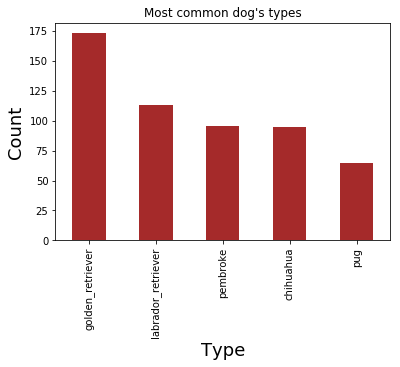

In [442]:
merged_Twitter["dog_type"].value_counts().head(5).plot(kind = "bar", title = "Most common dog's types", color = "Brown")
plt.xlabel("Type",fontsize = 18)
plt.ylabel("Count",fontsize = 18)

#### 2) the most common source 

In [437]:
merged_Twitter.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

Text(0,0.5,'Count')

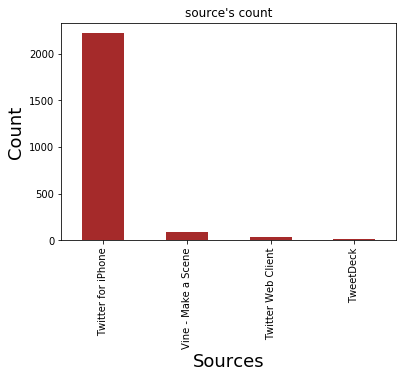

In [444]:
merged_Twitter["source"].value_counts().plot(kind = "bar", title = "source's count", color = "Brown")
plt.xlabel("Sources",fontsize = 18)
plt.ylabel("Count",fontsize = 18)

#### 3)  the most dog type had favourited 

In [447]:
merged_Twitter.sort_values(by = "favorite_count",ascending=False).head(5)

,tweet_id,timestamp,source,name,dog_type,dog_age_stage,text,rating_numerator,rating_denominator,favorite_count,retweet_count,expanded_urls
1039,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,None,labrador_retriever,doggo,Here's a doggo realizing you can stand in a po...,13,10,152215.0,75276.0,https://twitter.com/dog_rates/status/744234799...
413,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,None,lakeland_terrier,puppo,Here's a super supportive puppo participating ...,13,10,129824.0,42382.0,https://twitter.com/dog_rates/status/822872901...
534,807106840509214720,2016-12-09 06:17:20,Twitter for iPhone,Stephan,chihuahua,None,This is Stephan. He just wants to help. 13/10 ...,13,10,117526.0,54909.0,https://twitter.com/dog_rates/status/807106840...
135,866450705531457537,2017-05-22 00:28:40,Twitter for iPhone,Jamesy,french_bulldog,pupper,This is Jamesy. He gives a kiss to every other...,13,10,113752.0,32009.0,https://twitter.com/dog_rates/status/866450705...
1079,739238157791694849,2016-06-04 23:31:25,Twitter for iPhone,None,eskimo_dog,doggo,Here's a doggo blowing bubbles. It's downright...,13,10,112538.0,56043.0,https://twitter.com/dog_rates/status/739238157...


Text(0,0.5,'Count')

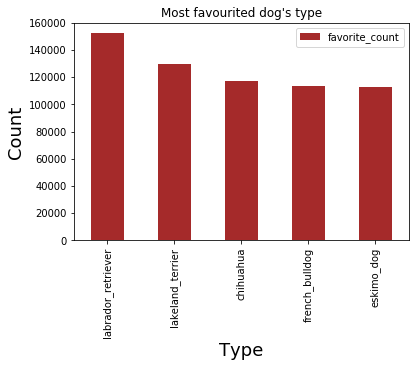

In [451]:
most_favourited = merged_Twitter.sort_values(by = "favorite_count",ascending=False).head(5)
most_favourited.plot(x = "dog_type",y = "favorite_count",kind = "bar", title = "Most favourited dog's type", color = "Brown")
plt.xlabel("Type",fontsize = 18)
plt.ylabel("Count",fontsize = 18)

#### 4) The most common dog's name had retweets 

In [452]:
merged_Twitter.sort_values(by = "retweet_count",ascending=False).head(5)

,tweet_id,timestamp,source,name,dog_type,dog_age_stage,text,rating_numerator,rating_denominator,favorite_count,retweet_count,expanded_urls
1039,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,None,labrador_retriever,doggo,Here's a doggo realizing you can stand in a po...,13,10,152215.0,75276.0,https://twitter.com/dog_rates/status/744234799...
1079,739238157791694849,2016-06-04 23:31:25,Twitter for iPhone,None,eskimo_dog,doggo,Here's a doggo blowing bubbles. It's downright...,13,10,112538.0,56043.0,https://twitter.com/dog_rates/status/739238157...
534,807106840509214720,2016-12-09 06:17:20,Twitter for iPhone,Stephan,chihuahua,None,This is Stephan. He just wants to help. 13/10 ...,13,10,117526.0,54909.0,https://twitter.com/dog_rates/status/807106840...
413,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,None,lakeland_terrier,puppo,Here's a super supportive puppo participating ...,13,10,129824.0,42382.0,https://twitter.com/dog_rates/status/822872901...
66,879415818425184262,2017-06-26 19:07:24,Twitter for iPhone,Duddles,english_springer,None,This is Duddles. He did an attempt. 13/10 some...,13,10,97014.0,39539.0,https://twitter.com/dog_rates/status/879415818...


Text(0,0.5,'Count')

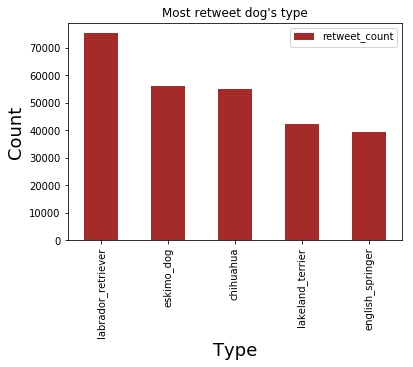

In [453]:
most_retweets = merged_Twitter.sort_values(by = "retweet_count",ascending=False).head(5)
most_retweets.plot(x = "dog_type",y = "retweet_count",kind = "bar", title = "Most retweet dog's type", color = "Brown")
plt.xlabel("Type",fontsize = 18)
plt.ylabel("Count",fontsize = 18)

#### 5) The most common dog stage 

In [464]:
merged_Twitter["dog_age_stage"].value_counts().head(5)[1:]

pupper         245
doggo           83
puppo           29
doggopupper     12
Name: dog_age_stage, dtype: int64

Text(0,0.5,'Count')

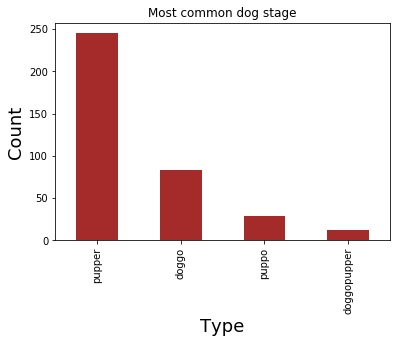

In [467]:
most_rating = merged_Twitter["dog_age_stage"].value_counts().head(5)[1:]
most_rating.plot(x = "dog_type",y = "rating_numerator"[1:],kind = "bar", title = "Most common dog stage", color = "Brown")
plt.xlabel("Type",fontsize = 18)
plt.ylabel("Count",fontsize = 18)